In [4]:
import librosa
from librosa import display
import matplotlib.pyplot as plt
from librosa.core import resample, to_mono
import os
import glob
import numpy as np
import pandas as pd
import scipy
from scipy.io import wavfile
from scipy import fftpack
from IPython.display import Audio
from pydub import AudioSegment
from pydub.utils import make_chunks

### Testing the spectrogram creation

**Slice the audio files into 0.1 sec chunks**

In [ ]:
chunk_length_ms = 100 # pydub calculates in millisec

In [ ]:
# wav_dst_0 = os.path.join('./audiofiles_chunks/0/')
# path_0 = './audiofiles/0/'
# count = 0
# for filename in glob.glob(os.path.join(path_0, '*.wav')):
#     myaudio = AudioSegment.from_file(filename) # ex: ./audiofiles/recording1.wav
#     chunk_length_ms = 100 # input in millisec
#     chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of 0.1 sec
#     count = count + 1
#     for i, chunk in enumerate(chunks):
#         chunk_name = str(count) + "chunk{0}.wav".format(i)
#         print("exporting", chunk_name)
#         chunk.export(out_f = wav_dst_0 + chunk_name, format="wav")

In [ ]:
# wav_dst_1 = os.path.join('./audiofiles_chunks/1/')
# path_1 = './audiofiles/1/'
# count = 0
# for filename in glob.glob(os.path.join(path_1, '*.wav')):
#     myaudio = AudioSegment.from_file(filename)
#     chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec
#     count = count + 1
#     for i, chunk in enumerate(chunks):
#         chunk_name = str(count) + "chunk{0}.wav".format(i)
#         print("exporting", chunk_name)
#         chunk.export(out_f = wav_dst_1 + chunk_name, format="wav")

### Spectrograms with Short Time Fourier Transform (STFT)

Now we convert the audio from time-domain into frequency-domain

First, let's test creating spectrograms out of 0.1 seconds long pieces of audio that we exported in the previous step

**Loading the first audio chunk file (0.1 sec long) and converting to 16 kHz**

In [64]:
file = "./audiofiles_chunks/0/1chunk28.wav"

In [32]:
wav, rate = librosa.load(file, sr=16000)

**Converted! Let's plot the wave file.** This is time-domain. Amplitude = 0 represents silence.

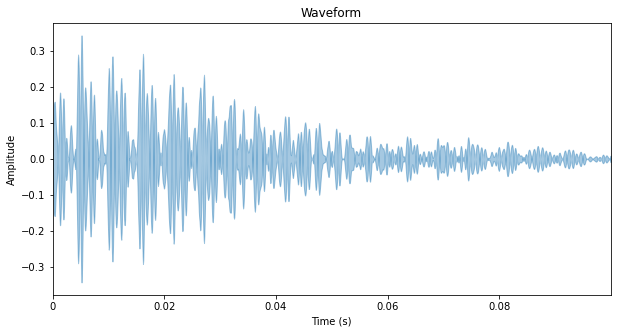

In [33]:
FIG_SIZE = (10, 5)
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(wav, rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()

**Below is the example of an image that we are going to be creating**

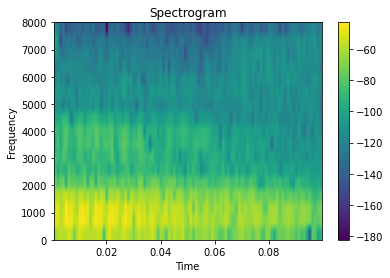

In [67]:
plt.specgram(wav, Fs=16000, NFFT=32, noverlap=16)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
plt.show()

*Test an image saving*

*We will save images without any labels nor annotations*

In [65]:
test_path = os.path.join('./audiofiles_chunks/0/1chunk28.wav')
test_wav, rate = librosa.load(test_path, sr=16000) # load data and convert to 16 khz

spectro = plt.figure(figsize=(0.97,1), dpi=298)
spectro = plt.specgram(test_wav, Fs=16000, NFFT=32, noverlap=16) # create a spectrogram
spectro = plt.gca().set_axis_off() # remove the axis text
plt.savefig('./test/images/test1.jpg', format='jpg', pad_inches=0, bbox_inches='tight')
plt.close('all')

### Create Spectrograms for each of the 0.1 sec chopped audio slices

First, the images with 0 class.

In [ ]:
# count = 0

# for filename in glob.glob(os.path.join('./audiofiles_chunks/0/', '*.wav')) :
#     audiofile, rate = librosa.load(filename, sr=16000) # load and convert to 16 khz
#     spectro = plt.figure(figsize=(0.97,1), dpi=298)
#     spectro = plt.specgram(audiofile, Fs=16000, NFFT=32, noverlap=16) # create a spectrogram
#     spectro = plt.gca().set_axis_off() # remove the axis text
#     count = count + 1
#     plot_name = str(count) + '.jpg'
#     plt.savefig(fname='./images/0/' + plot_name, format='jpg', pad_inches=0, bbox_inches='tight')
#     plt.close('all')

Then, the images with 1 class.

In [ ]:
# count = 0

# for filename in glob.glob(os.path.join('./audiofiles_chunks/1/', '*.wav')) :
#     audiofile, rate = librosa.load(filename, sr=16000) # load and convert to 16 khz
#     spectro = plt.figure(figsize=(0.97,1), dpi=298)
#     spectro = plt.specgram(audiofile, Fs=16000, NFFT=32, noverlap=16) # create a spectrogram
#     spectro = plt.gca().set_axis_off() # remove the axis text
#     count = count + 1
#     plot_name = str(count) + '.jpg'
#     plt.savefig(fname='./images/1/' + plot_name, format='jpg', pad_inches=0, bbox_inches='tight')
#     plt.close('all')